In [1]:
import pandas as pd
# Load the ASDA dataset
asda_data = pd.read_csv('datasets/All_Data_ASDA.csv')

# Display the first 5 rows 
asda_data.head()

/var/folders/vz/t7hhp_d94_x5_9qpjz3_2bf80000gn/T/ipykernel_58158/3911769931.py:3: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  asda_data = pd.read_csv('datasets/All_Data_ASDA.csv')


,supermarket,prices_(¬£),prices_unit_(¬£),unit,names,date,category,own_brand
0,ASDA,1.09,0.14,unit,ASDA Garden Gang Brilliant Bananas,20240211,fresh_food,True
1,ASDA,1.29,0.26,unit,ASDA Organic Fairtrade Bananas,20240211,fresh_food,True
2,ASDA,2.45,4.90,kg,ASDA Frozen For Freshness Fruit Salad 500g,20240211,fresh_food,True
3,ASDA,3.00,7.50,kg,ASDA Subtly Sweet Chestnuts 400g,20240211,fresh_food,True
4,ASDA,1.25,25.00,l,Colgate Kids Mild Fruit Baby Toothpaste 0-2 Years,20240211,fresh_food,False


In [2]:
# Get a concise summary of the DataFrame
asda_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 834899 entries, 0 to 834898
Data columns (total 8 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   supermarket       834899 non-null  object 
 1   prices_(¬£)       834896 non-null  float64
 2   prices_unit_(¬£)  834824 non-null  float64
 3   unit              834824 non-null  object 
 4   names             834879 non-null  object 
 5   date              834899 non-null  int64  
 6   category          834899 non-null  object 
 7   own_brand         834879 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 51.0+ MB


In [3]:
# Get a quick statistical overview of numerical columns
asda_data.describe()

,prices_(¬£),prices_unit_(¬£),date
count,834896.000000,834824.000000,8.348990e+05
mean,5.748917,74.468760,2.024015e+07
std,9.373342,1135.487599,3.976175e+01
min,0.050000,0.000000,2.024011e+07
25%,1.700000,3.400000,2.024012e+07
50%,3.000000,7.500000,2.024012e+07
75%,6.500000,15.600000,2.024020e+07
max,479.990000,99778.000000,2.024021e+07


In [4]:
# Check for missing values
asda_data.isnull().sum()

supermarket          0
prices_(¬£)          3
prices_unit_(¬£)    75
unit                75
names               20
date                 0
category             0
own_brand           20
dtype: int64

In [5]:
# Correcting data types: Convert the 'date' column to datetime format
asda_data['date'] = pd.to_datetime(asda_data['date'], format='%Y%m%d')

In [6]:
# Renaming the columns
asda_data.rename(columns={'prices_(¬£)': 'prices_pounds', 'prices_unit_(¬£)': 'per_unit_price'}, 
                 inplace=True)
asda_data.head()

,supermarket,prices_pounds,per_unit_price,unit,names,date,category,own_brand
0,ASDA,1.09,0.14,unit,ASDA Garden Gang Brilliant Bananas,2024-02-11,fresh_food,True
1,ASDA,1.29,0.26,unit,ASDA Organic Fairtrade Bananas,2024-02-11,fresh_food,True
2,ASDA,2.45,4.90,kg,ASDA Frozen For Freshness Fruit Salad 500g,2024-02-11,fresh_food,True
3,ASDA,3.00,7.50,kg,ASDA Subtly Sweet Chestnuts 400g,2024-02-11,fresh_food,True
4,ASDA,1.25,25.00,l,Colgate Kids Mild Fruit Baby Toothpaste 0-2 Years,2024-02-11,fresh_food,False


### Checking for null values

In [7]:
# Checking which rows are null
asda_null = asda_data[asda_data.isnull().any(axis=1)]
print(asda_null)

       supermarket  prices_pounds  per_unit_price unit  \
9753          ASDA          35.25             NaN  NaN   
12244         ASDA           7.80             NaN  NaN   
35996         ASDA          35.25             NaN  NaN   
37927         ASDA           7.80             NaN  NaN   
63469         ASDA          35.25             NaN  NaN   
...            ...            ...             ...  ...   
788774        ASDA           3.00             NaN  NaN   
790366        ASDA          35.25             NaN  NaN   
793420        ASDA           7.80             NaN  NaN   
813141        ASDA           3.00             NaN  NaN   
814201        ASDA           3.00             NaN  NaN   

                                                    names       date  \
9753           Signature Red Filter Multipack 5x10 Cigars 2024-02-11   
12244                           Signature Original Cigars 2024-02-11   
35996          Signature Red Filter Multipack 5x10 Cigars 2024-02-10   
37927          

In [8]:
# Droping the rows with missing values in the 'names' column
asda_data.dropna(subset=['names'], inplace=True)

rows_starting_with_redFilter = asda_data[asda_data['names'].str.startswith('Signature Red Filter Multipack 5x10 Cigars')]
#print(rows_starting_with_redFilter)

product_name = "Signature Red Filter Multipack 5x10 Cigars"
per_unit_price = 7.05
unit = "unit"

# Imputing null values for the specific product
asda_data.loc[asda_data['names'] == product_name, 'unit'] = asda_data.loc[asda_data['names'] == product_name, 'unit'].fillna(unit)
asda_data.loc[asda_data['names'] == product_name, 'per_unit_price'] = asda_data.loc[asda_data['names'] == product_name, 'per_unit_price'].fillna(per_unit_price)

# Verifing changes
#print(asda_data[asda_data['names'] == product_name])

### Imputing the null values

In [9]:
rows_starting_with_original = asda_data[asda_data['names'].str.startswith('Signature Original Cigars')]
#print(rows_starting_with_original)

product_name = "Signature Original Cigars"
per_unit_price = 0.78
unit = "unit"

# Imputing null values for the specific product
asda_data.loc[asda_data['names'] == product_name, 'unit'] = asda_data.loc[asda_data['names'] == product_name, 'unit'].fillna(unit)
asda_data.loc[asda_data['names'] == product_name, 'per_unit_price'] = asda_data.loc[asda_data['names'] == product_name, 'per_unit_price'].fillna(per_unit_price)

# Verifing changes
#print(asda_data[asda_data['names'] == product_name])

In [12]:
rows_starting_with_Tea = asda_data[asda_data['names'].str.startswith('Original Source Tingly Mint & Tea Tree Shower Refill')]
#print(rows_starting_with_Tea)

product_name = "Original Source Tingly Mint & Tea Tree Shower Refill"
per_unit_price = 3.0
unit = "l"

# Imputing null values for the specific product
asda_data.loc[asda_data['names'] == product_name, 'unit'] = asda_data.loc[asda_data['names'] == product_name, 'unit'].fillna(unit)
asda_data.loc[asda_data['names'] == product_name, 'per_unit_price'] = asda_data.loc[asda_data['names'] == product_name, 'per_unit_price'].fillna(per_unit_price)

# Verifing changes
#print(asda_data[asda_data['names'] == product_name])

In [16]:
rows_starting_with_sheaButter = asda_data[asda_data['names'].str.startswith('Original Source Tropical Coconut & Shea Butter Shower Refill')]
#print(rows_starting_with_sheaButter)

product_name = "Original Source Tropical Coconut & Shea Butter Shower Refill"
per_unit_price = 3.0
unit = "l"

# Imputing null values for the specific product
asda_data.loc[asda_data['names'] == product_name, 'unit'] = asda_data.loc[asda_data['names'] == product_name, 'unit'].fillna(unit)
asda_data.loc[asda_data['names'] == product_name, 'per_unit_price'] = asda_data.loc[asda_data['names'] == product_name, 'per_unit_price'].fillna(per_unit_price)

# Verifing changes
#print(asda_data[asda_data['names'] == product_name])

In [17]:
asda_data.isnull().sum()

supermarket       0
prices_pounds     0
per_unit_price    0
unit              0
names             0
date              0
category          0
own_brand         0
dtype: int64

### Visualizations

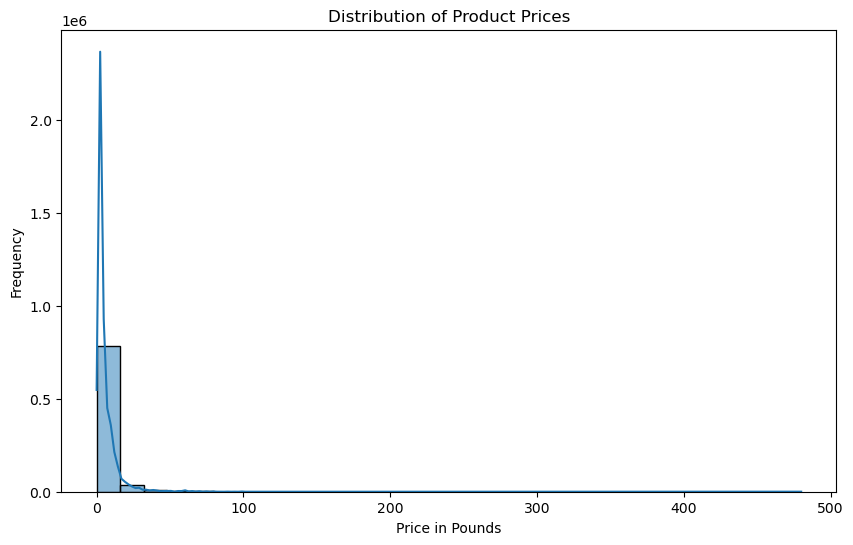

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# Overall Price Distribution using a Histogram
plt.figure(figsize=(10, 6))
sns.histplot(asda_data['prices_pounds'], bins=30, kde=True)
plt.title('Distribution of Product Prices')
plt.xlabel('Price in Pounds')
plt.ylabel('Frequency')
plt.show()

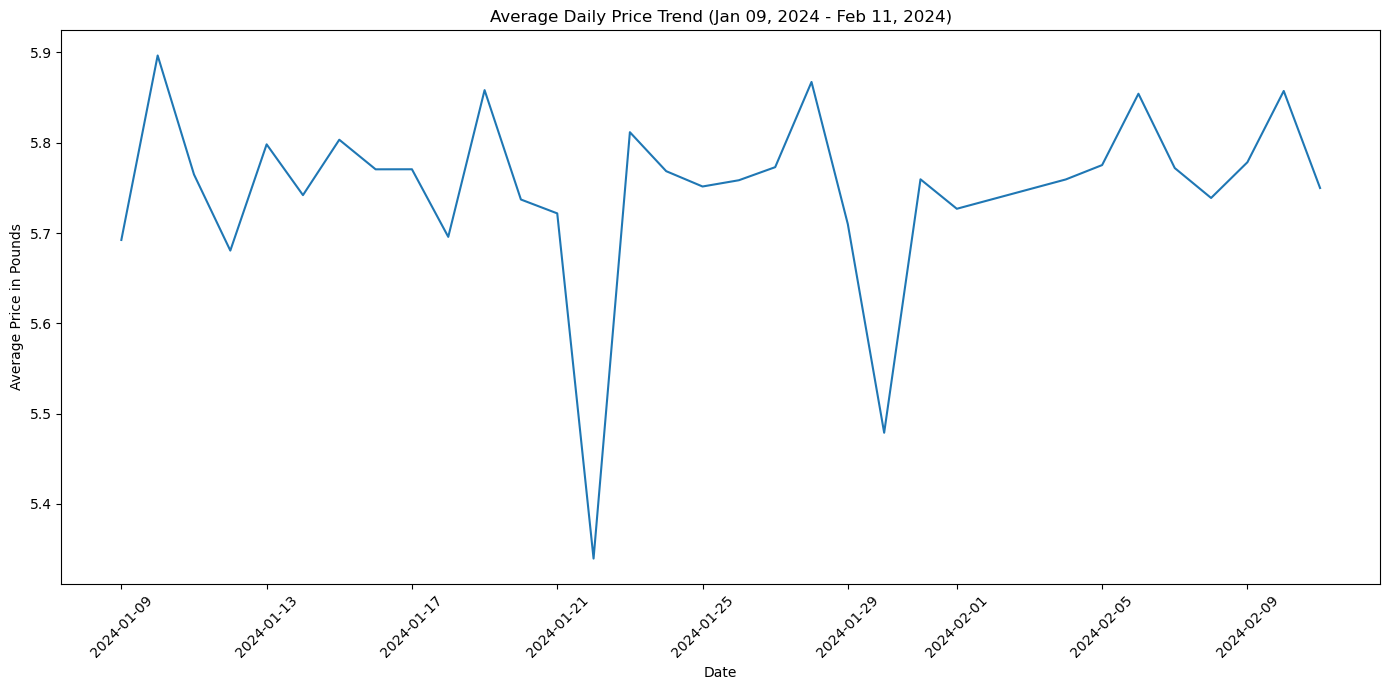

In [9]:
# Price Trends Over Time
# Adjusting for daily price trends
asda_data['date'] = pd.to_datetime(asda_data['date'])  # Ensure 'date' is in datetime format
daily_price_trends = asda_data.groupby(asda_data['date'])['prices_pounds'].mean().reset_index()

plt.figure(figsize=(14, 7))
sns.lineplot(data=daily_price_trends, x='date', y='prices_pounds')
plt.title('Average Daily Price Trend (Jan 09, 2024 - Feb 11, 2024)')
plt.xlabel('Date')
plt.ylabel('Average Price in Pounds')
plt.xticks(rotation=45)
plt.tight_layout()  # Adjusts plot parameters to give some padding and prevent overlap
plt.show()

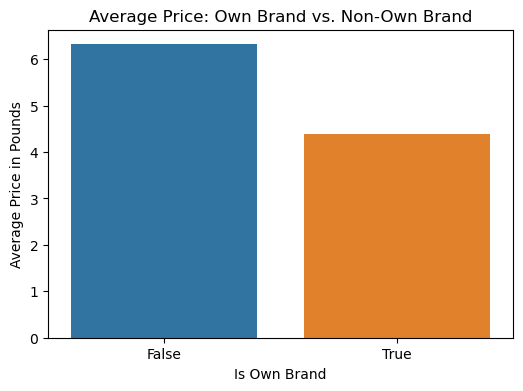

In [10]:
# Average Price Comparison: Own Brand vs. Non-Own Brand
own_brand_prices = asda_data.groupby('own_brand')['prices_pounds'].mean().reset_index()

plt.figure(figsize=(6, 4))
sns.barplot(x='own_brand', y='prices_pounds', data=own_brand_prices)
plt.title('Average Price: Own Brand vs. Non-Own Brand')
plt.xlabel('Is Own Brand')
plt.ylabel('Average Price in Pounds')
plt.show()

/var/folders/1s/ll25zv1x4939zjl8v9j5kqm40000gn/T/ipykernel_91643/1592231887.py:12: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='brand_type', y='prices_pounds', data=asda_data, estimator=np.mean, ci=None)


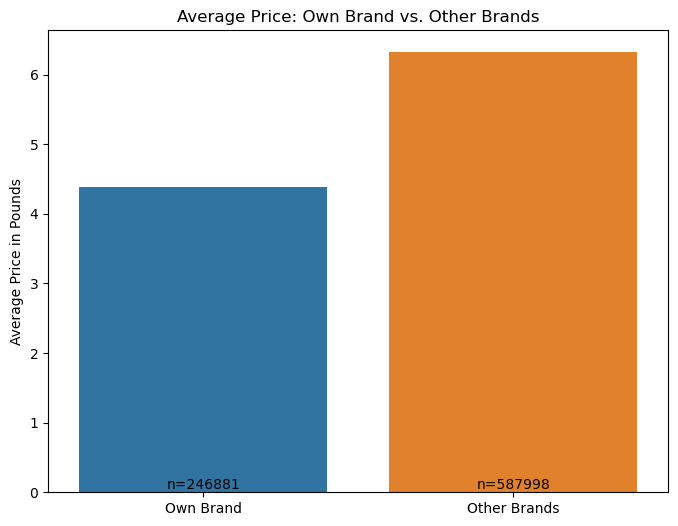

In [11]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



# Create a more descriptive label for 'own_brand'
asda_data['brand_type'] = asda_data['own_brand'].apply(lambda x: 'Own Brand' if x else 'Other Brands')

# Plotting with enhanced labeling and product count
plt.figure(figsize=(8, 6))
sns.barplot(x='brand_type', y='prices_pounds', data=asda_data, estimator=np.mean, ci=None)
plt.title('Average Price: Own Brand vs. Other Brands')
plt.xlabel('')
plt.ylabel('Average Price in Pounds')

# Adding text annotations for the number of products
num_own_brand = len(asda_data[asda_data['own_brand'] == True])
num_other_brands = len(asda_data[asda_data['own_brand'] == False])
total_counts = [num_own_brand, num_other_brands]
for index, value in enumerate(total_counts):
    plt.text(index, 0, f'n={value}', ha='center', va='bottom', color='black')

plt.show()

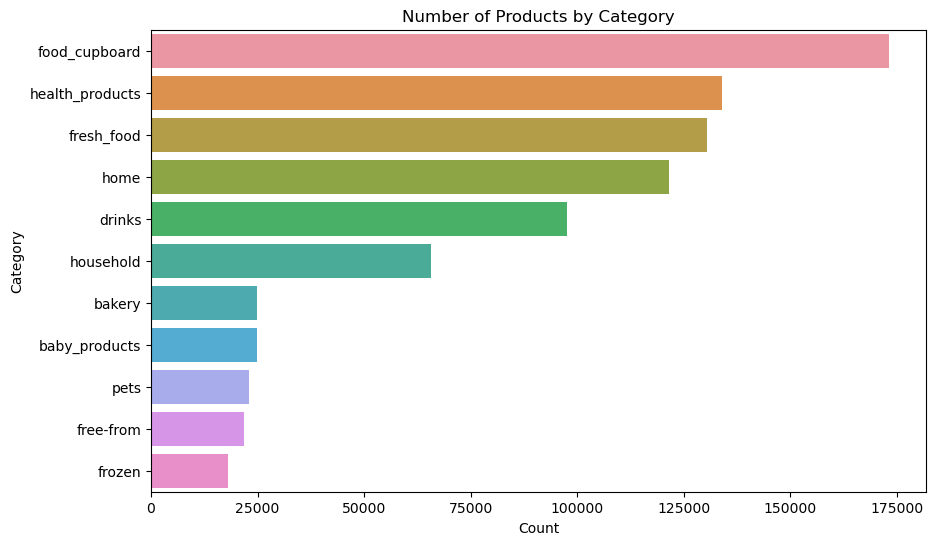

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

# Bar chart showing the number of products per category
plt.figure(figsize=(10, 6))
sns.countplot(y='category', data=asda_data, order=asda_data['category'].value_counts().index)
plt.title('Number of Products by Category')
plt.xlabel('Count')
plt.ylabel('Category')
plt.show()

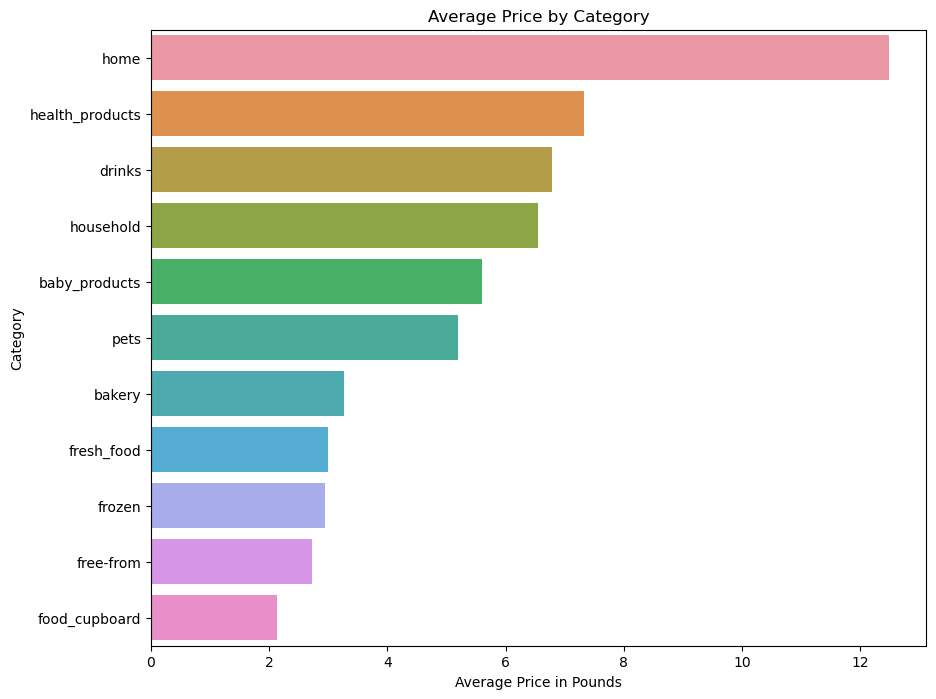

In [13]:
# Calculate the average price per category
average_price_per_category = asda_data.groupby('category')['prices_pounds'].mean().reset_index().sort_values(by='prices_pounds', ascending=False)

# Bar chart showing the average price per category
plt.figure(figsize=(10, 8))
sns.barplot(x='prices_pounds', y='category', data=average_price_per_category)
plt.title('Average Price by Category')
plt.xlabel('Average Price in Pounds')
plt.ylabel('Category')
plt.show()

Understand not just which categories have the most products, but also how the categories compare in terms of pricing. It can reveal, for example, if luxury or specialty categories tend to have higher average prices, or if staple goods are priced more competitively.

In [59]:
# category_proportions = asda_data.groupby('category')['prices_pounds'].sum()
# plt.pie(category_proportions, labels=category_proportions.index, autopct='%1.1f%%')
# plt.title('Proportion of Prices by Category')
# plt.show()

A pie chart, visualizing the proportion of total sales or total product count represented by each category. This helps in understanding which categories dominate the supermarket's offerings or sales.

In [22]:
import pandas as pd

# Load the dataset
asda_data = pd.read_csv('datasets/All_Data_ASDA.csv', low_memory=False)

# Ensure that 'names' column is of type string
asda_data['names'] = asda_data['names'].astype(str)

# Group the data by 'category' and collect unique product names
category_products = asda_data.groupby('category')['names'].apply(lambda x: x.unique()).reset_index()

# Create a dictionary where each key is a category and value is a list of products
category_dict = {row['category']: list(row['names']) for index, row in category_products.iterrows()}

# Find the longest list of products to determine the number of rows needed
max_length = max(len(products) for products in category_dict.values())

# Create a new dictionary where each category has the same number of items (filling with None if needed)
equal_length_dict = {category: (products + [None]*(max_length - len(products))) for category, products in category_dict.items()}

# Convert dictionary to DataFrame
category_df = pd.DataFrame(equal_length_dict)

# Save this to a CSV file for better readability in Excel or other programs
category_df.to_csv('datasets/category_products.csv', index=False)

In [61]:
# Load the dataset
asda_data = pd.read_csv('datasets/category_products.csv', low_memory=False)

category_products.head(10)

,category,names
0,baby_products,"[Childs Farm Sun Cream 50+ SPF, Munchkin Shamp..."
1,bakery,[Allinson's Fantastic Fruit Loaf with Sultanas...
2,drinks,"[Sweet Freedom Choc Shot Liquid Hot Chocolate,..."
3,food_cupboard,[Pot Noodle Piri-Piri Chicken Instant Snack No...
4,free-from,[The Vegetarian Butcher What The Cluck Vegan C...
5,fresh_food,"[ASDA Garden Gang Brilliant Bananas, ASDA Orga..."
6,frozen,"[Itsu 6 Teriyaki Chicken Bao'Buns 270g, ASDA R..."
7,health_products,[Always Discreet Incontinence Pads Plus Women ...
8,home,"[LEGO Heart Ornament 40638, Moriah Elizabeth 6..."
9,household,"[George Home Ironing Board Cover, ASDA 20 Bin ..."


In [62]:

import pandas as pd

# Load the dataset
df = pd.read_csv('datasets/category_products.csv')

# Define keywords for each subcategory
cleaning_keywords = ['cleaner', 'detergent', 'disinfectant', 'bleach', 'wipes', 'wash','soap dish','laundry','dispenser','fabric','tissues','cloth','softener','tissue','mat','freshner','cleaning','toilet','bin']
personal_care_keywords = ['shampoo', 'soap', 'toothpaste', 'conditioner', 'deodorant','comb','hairbrush','beauty','hair','intimate','bath','towel']
kitchen_essentials_keywords = ['bowls','plates','spoons','utensils','pan','dinner','bowl','spoon','plate','blender','toaster','straws','kitchen','stainless','tray','kettle','jug','dish','serving','chopping','bottle','water','storage','casserole']

# Function to determine subcategory
def determine_subcategory(product_name):
    if any(keyword in product_name for keyword in cleaning_keywords):
        return 'cleaning_supplies'
    elif any(keyword in product_name for keyword in personal_care_keywords):
        return 'personal_care'
    elif any(keyword in product_name for keyword in kitchen_essentials_keywords):
        return 'kitchen_essentials'
    else:
        return 'other_household'

# Apply the function to the household column and create a new subcategory column
df['subcategory'] = df['household'].apply(lambda x: determine_subcategory(str(x).lower()))

# Create new columns for each subcategory
df['cleaning_supplies'] = df.apply(lambda x: x['household'] if x['subcategory'] == 'cleaning_supplies' else '', axis=1)
df['personal_care'] = df.apply(lambda x: x['household'] if x['subcategory'] == 'personal_care' else '', axis=1)
df['kitchen_essentials'] = df.apply(lambda x: x['household'] if x['subcategory'] == 'kitchen_essentials' else '', axis=1)
df['other_household'] = df.apply(lambda x: x['household'] if x['subcategory'] == 'other_household' else '', axis=1)

# Drop the temporary subcategory column
df.drop('subcategory', axis=1, inplace=True)

# Save the updated DataFrame back to CSV
df.to_csv('datasets/category_products.csv', index=False)

In [24]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize


nltk.download('punkt')
nltk.download('stopwords')
# Load the dataset
df = pd.read_csv('datasets/category_products.csv')

# Define subcategories and keywords
subcategories_keywords = {
    'cleaning_supplies': ['cleaner', 'detergent', 'disinfectant', 'bleach', 'wipes', 'wash', 'soap dish', 'laundry', 'dispenser', 'fabric', 'tissues', 'cloth', 'softener', 'tissue', 'mat', 'freshener', 'cleaning', 'toilet', 'bin'],
    'personal_care': ['shampoo', 'soap', 'toothpaste', 'conditioner', 'deodorant', 'comb', 'hairbrush', 'beauty', 'hair', 'intimate', 'bath', 'towel'],
    'kitchen_essentials': ['bowls', 'plates', 'spoons', 'utensils', 'pan', 'dinner', 'bowl', 'spoon', 'plate', 'blender', 'toaster', 'straws', 'kitchen', 'stainless', 'tray', 'kettle', 'jug', 'dish', 'serving', 'chopping', 'bottle', 'water', 'storage', 'casserole']
}

# Function to preprocess text and categorize
def categorize_product(product_name):
    # Tokenize, remove stopwords, and stem
    tokens = word_tokenize(product_name.lower())
    stopped_tokens = [word for word in tokens if word.isalpha() and word not in stopwords.words('english')]
    ps = PorterStemmer()
    stemmed_tokens = [ps.stem(word) for word in stopped_tokens]
    
    for subcategory, keywords in subcategories_keywords.items():
        if any(ps.stem(keyword) in stemmed_tokens for keyword in keywords):
            return subcategory
    return 'other_household'

# Assuming 'household' column contains a string representation of product names
# Create new DataFrame to hold subcategorized products
subcategorized_products = pd.DataFrame()

# Iterate over each product in 'household' column
for index, product in df['household'].dropna().items():
    subcategory = categorize_product(product)
    # Create or append the product name to the correct subcategory column
    if subcategory not in subcategorized_products:
        subcategorized_products[subcategory] = pd.Series()
    subcategorized_products.at[index, subcategory] = product

# Now, subcategorized_products DataFrame will have columns for each subcategory with product names
# Fill NaN values with an empty string for consistency
subcategorized_products.fillna('', inplace=True)

for column in subcategorized_products.columns:
    df[column] = subcategorized_products[column]

# Save the updated DataFrame
df.to_csv('datasets/category_products_updated.csv', index=False)


[nltk_data] Downloading package punkt to /Users/purvi/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /Users/purvi/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
